## Consumindo API e tratando dados com Python

Esses passos de ler api foram retirados desse [link]('https://pt.linkedin.com/pulse/consumindo-api-e-tratando-dados-com-python-alexandre-tavares')

> Vamos precisar instalar as bibliotecas do Python citado acima, caso estes não esteja instalado, execute a célula abaixo:

In [4]:
!pip install json
!pip install requests
!pip install pandas

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


> Com as bibliotecas instanciadas precisamos fazer a requisição à API para capturar os dados e armazena los em uma variável.

In [47]:
import requests 
import json 

START_DATE = '2000-01-01'
END_DATE = '2021-12-31'
API_KEY =  'uXE3otxhmEgary1HVziNXA2iOIW1EenzH4edOsQ1'

# vemNasa = requests.get('https://api.nasa.gov/neo/rest/v1/feed?start_date=2019-01-01&end_date=2022-01-20&api_key=uXE3otxhmEgary1HVziNXA2iOIW1EenzH4edOsQ1')

# vemNasa = requests.get('https://api.nasa.gov/neo/rest/v1/neo/3542519?api_key=uXE3otxhmEgary1HVziNXA2iOIW1EenzH4edOsQ1')

# vemNasa = requests.get('https://api.nasa.gov/neo/rest/v1/neo/browse?api_key=uXE3otxhmEgary1HVziNXA2iOIW1EenzH4edOsQ1')

# vemNasa = requests.get('https://api.nasa.gov/neo/rest/v1/feed?start_date='+START_DATE+'&end_date='+END_DATE+'&api_key='+API_KEY)


vemNasa = requests.get('https://api.nasa.gov/neo/rest/v1/neo/3542519?api_key='+API_KEY)




"""
# Convertendo dados da API para m dicionario
# Os dados capturados estão no formato JSON e para que possamos manipulá los em 
# python precisamos converter o mesmo em um dicionário e para isso utilizamos a 
# função loads da biblioteca JSON.
"""
dicNasa = json.loads(vemNasa.content)

"""
Exibir as chaves do Dicionário

Precisamos agora entender a estrutura do nosso dicionário e para isso precisamos
exibir algumas informações estruturais.
"""
dicNasa.keys()


dict_keys(['links', 'id', 'neo_reference_id', 'name', 'designation', 'nasa_jpl_url', 'absolute_magnitude_h', 'estimated_diameter', 'is_potentially_hazardous_asteroid', 'close_approach_data', 'orbital_data', 'is_sentry_object'])



> Com o resultado anterior podemos ver que temos uma dicionario chamado ***near_earth_objects*** e este contém nossos dados, para confirmarmos esta hipótese podemos exibir a estrutura.



In [54]:
dicNasa['close_approach_data'][0].keys()

dict_keys(['close_approach_date', 'close_approach_date_full', 'epoch_date_close_approach', 'relative_velocity', 'miss_distance', 'orbiting_body'])

Converte dicionário em Data Frame

Após termos entendido a estrutura do nosso dicionário podemos agora transformar a chave results em um data frame do pandas, pois só assim conseguiremos utilizar as funções do mesmo.

In [59]:
"""
1. Criar um dataset que contenha informações sobre os objetos próximos à terra,
   contendo informações das aproximações (esse deve ser um segundo `DataFrame`
   além do que contém informações básicas sobre os objetos);
  * Você deve fazer requisições às primeiras 100 páginas do Serviço;
"""

import pandas as pd

dfNasa= pd.DataFrame(dicNasa ['close_approach_data'])


Descrevendo e limpando o dataset

Para que possamos entender nosso data frame e sabermos quais colunas temos que ajustar e quais temos que eliminar ou mesmo manter precisamos entender como estão e para isso precisamos coletar informações sobre o data frame.



In [60]:
dfNasa.count()

close_approach_date          282
close_approach_date_full     282
epoch_date_close_approach    282
relative_velocity            282
miss_distance                282
orbiting_body                282
dtype: int64

In [61]:
dfNasa

,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity,miss_distance,orbiting_body
0,1900-06-01,1900-Jun-01 16:40,-2195882400000,"{'kilometers_per_second': '30.9365099986', 'ki...","{'astronomical': '0.0445445094', 'lunar': '17....",Merc
1,1900-07-07,1900-Jul-07 22:08,-2192752320000,"{'kilometers_per_second': '31.7781586282', 'ki...","{'astronomical': '0.14166333', 'lunar': '55.10...",Venus
2,1900-07-27,1900-Jul-27 20:47,-2191029180000,"{'kilometers_per_second': '23.8645306705', 'ki...","{'astronomical': '0.2177281759', 'lunar': '84....",Earth
3,1902-02-11,1902-Feb-11 06:38,-2142350520000,"{'kilometers_per_second': '28.1654321935', 'ki...","{'astronomical': '0.0869546562', 'lunar': '33....",Merc
4,1903-09-02,1903-Sep-02 16:25,-2093240100000,"{'kilometers_per_second': '20.7059211769', 'ki...","{'astronomical': '0.192051142', 'lunar': '74.7...",Earth
...,...,...,...,...,...,...
277,2192-07-28,2192-Jul-28 09:17,7023748620000,"{'kilometers_per_second': '21.4820097709', 'ki...","{'astronomical': '0.1470280974', 'lunar': '57....",Earth
278,2195-09-03,2195-Sep-03 14:04,7121570640000,"{'kilometers_per_second': '23.0727557116', 'ki...","{'astronomical': '0.251472684', 'lunar': '97.8...",Earth
279,2196-08-01,2196-Aug-01 09:17,7150324620000,"{'kilometers_per_second': '14.9085161104', 'ki...","{'astronomical': '0.0876420518', 'lunar': '34....",Earth
280,2197-01-12,2197-Jan-12 08:34,7164491640000,"{'kilometers_per_second': '24.027396903', 'kil...","{'astronomical': '0.0627001024', 'lunar': '24....",Venus


1. Encontrar os seguintes dados:
  * Número de objetos perigosos a terra;
  * Distância média e desvio padrão entre objetos perigosos e a terra;
  * Histograma mostrando quantos objetos perigosos tiveram aproximações com a
    terra entre os anos 2000 e 2021 (agrupe os objetos por ano);
  * Histograma de tamanhos de objetos que são perigosos;
  * Histograma de tamanhos de objetos não perigosos;

In [183]:
df_terra=dfNasa['orbiting_body']=='Earth'
filtered_df_terra = dfNasa[df_terra]
filtered_df_terra

,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity,miss_distance,orbiting_body,year,month
2,1900-07-27,1900-Jul-27 20:47,-2191029180000,"{'kilometers_per_second': '23.8645306705', 'ki...","{'astronomical': '0.2177281759', 'lunar': '84....",Earth,1900,7
4,1903-09-02,1903-Sep-02 16:25,-2093240100000,"{'kilometers_per_second': '20.7059211769', 'ki...","{'astronomical': '0.192051142', 'lunar': '74.7...",Earth,1903,9
5,1904-07-26,1904-Jul-26 08:05,-2064930900000,"{'kilometers_per_second': '15.8484563854', 'ki...","{'astronomical': '0.0426654763', 'lunar': '16....",Earth,1904,7
7,1907-08-23,1907-Aug-23 15:07,-1967878380000,"{'kilometers_per_second': '30.7221068317', 'ki...","{'astronomical': '0.4441808062', 'lunar': '172...",Earth,1907,8
8,1908-08-17,1908-Aug-17 14:30,-1936776600000,"{'kilometers_per_second': '14.3282626319', 'ki...","{'astronomical': '0.1463952114', 'lunar': '56....",Earth,1908,8
...,...,...,...,...,...,...,...,...
275,2191-09-02,2191-Sep-02 09:17,6995236620000,"{'kilometers_per_second': '15.3625768153', 'ki...","{'astronomical': '0.1327627145', 'lunar': '51....",Earth,2191,9
277,2192-07-28,2192-Jul-28 09:17,7023748620000,"{'kilometers_per_second': '21.4820097709', 'ki...","{'astronomical': '0.1470280974', 'lunar': '57....",Earth,2192,7
278,2195-09-03,2195-Sep-03 14:04,7121570640000,"{'kilometers_per_second': '23.0727557116', 'ki...","{'astronomical': '0.251472684', 'lunar': '97.8...",Earth,2195,9
279,2196-08-01,2196-Aug-01 09:17,7150324620000,"{'kilometers_per_second': '14.9085161104', 'ki...","{'astronomical': '0.0876420518', 'lunar': '34....",Earth,2196,8


In [66]:
# Número de objetos perigosos a terra;
filtered_df_terra.count()

close_approach_date          162
close_approach_date_full     162
epoch_date_close_approach    162
relative_velocity            162
miss_distance                162
orbiting_body                162
dtype: int64

In [83]:
# Observando a coluna miss_ainda está na forma de um dicionario então deve-se passar para a forma de um dataframe

filtered_df_terra['miss_distance']

	

2      {'astronomical': '0.2177281759', 'lunar': '84....
4      {'astronomical': '0.192051142', 'lunar': '74.7...
5      {'astronomical': '0.0426654763', 'lunar': '16....
7      {'astronomical': '0.4441808062', 'lunar': '172...
8      {'astronomical': '0.1463952114', 'lunar': '56....
                             ...                        
275    {'astronomical': '0.1327627145', 'lunar': '51....
277    {'astronomical': '0.1470280974', 'lunar': '57....
278    {'astronomical': '0.251472684', 'lunar': '97.8...
279    {'astronomical': '0.0876420518', 'lunar': '34....
281    {'astronomical': '0.1459280154', 'lunar': '56....
Name: miss_distance, Length: 162, dtype: object

In [109]:
""" 
Demorou encontrar essa gambiarra, pórem com isso pode-se transformar o dicionário em tabela

Agora pode-se calular a média e o desvio padrão

"""
a = pd.DataFrame.from_records(filtered_df_terra)
agoraVai = pd.DataFrame.from_records(a['miss_distance'])
agoraVai

,astronomical,lunar,kilometers,miles
0,0.2177281759,84.6962604251,32571671.353625333,20239098.0796942754
1,0.192051142,74.707894238,28730441.77426754,17852268.697830452
2,0.0426654763,16.5968702807,6382664.377015481,3966003.7378403978
3,0.4441808062,172.7863336118,66448502.502402794,41289184.8500507972
4,0.1463952114,56.9477372346,21900411.803639718,13608284.8702273884
...,...,...,...,...
157,0.1327627145,51.6446959405,19861019.304618115,12341065.133095387
158,0.1470280974,57.1939298886,21995090.201192538,13667115.2984635044
159,0.251472684,97.822874076,37619777.88958308,23375846.028203304
160,0.0876420518,34.0927581502,13111064.271709666,8146837.5645627508


In [203]:
filtered_df_terra['relative_velocity']


2      {'kilometers_per_second': '23.8645306705', 'ki...
4      {'kilometers_per_second': '20.7059211769', 'ki...
5      {'kilometers_per_second': '15.8484563854', 'ki...
7      {'kilometers_per_second': '30.7221068317', 'ki...
8      {'kilometers_per_second': '14.3282626319', 'ki...
                             ...                        
275    {'kilometers_per_second': '15.3625768153', 'ki...
277    {'kilometers_per_second': '21.4820097709', 'ki...
278    {'kilometers_per_second': '23.0727557116', 'ki...
279    {'kilometers_per_second': '14.9085161104', 'ki...
281    {'kilometers_per_second': '14.5145715133', 'ki...
Name: relative_velocity, Length: 162, dtype: object

In [204]:
""" 
Demorou encontrar essa gambiarra, pórem com isso pode-se transformar o dicionário em tabela

Agora pode-se calular a média e o desvio padrão

"""
a = pd.DataFrame.from_records(filtered_df_terra)
relative_velocity = pd.DataFrame.from_records(a['relative_velocity'])
relative_velocity

,kilometers_per_second,kilometers_per_hour,miles_per_hour
0,23.8645306705,85912.3104137521,53382.5686568117
1,20.7059211769,74541.3162370142,46317.0750807159
2,15.8484563854,57054.4429874501,35451.4120885075
3,30.7221068317,110599.5845939864,68722.2807717467
4,14.3282626319,51581.7454748242,32050.8906812873
...,...,...,...
157,15.3625768153,55305.2765349659,34364.5480780737
158,21.4820097709,77335.2351751622,48053.1076564779
159,23.0727557116,83061.9205617362,51611.4472512633
160,14.9085161104,53670.6579973928,33348.8596873245


In [143]:
#Distância média e desvio padrão entre objetos perigosos e a terra;

import numpy as np 

#mudando o tipo da coluna pois não dava para fazer calculos
agoraVai['kilometers'] = agoraVai['kilometers'].astype(float).round(2)
agoraVai['kilometers'].describe()

count    1.620000e+02
mean     3.154846e+07
std      1.955441e+07
min      2.388098e+06
25%      1.930479e+07
50%      2.226490e+07
75%      4.778508e+07
max      7.459497e+07
Name: kilometers, dtype: float64

Text(0.5, 0, 'Distancia interquartis')

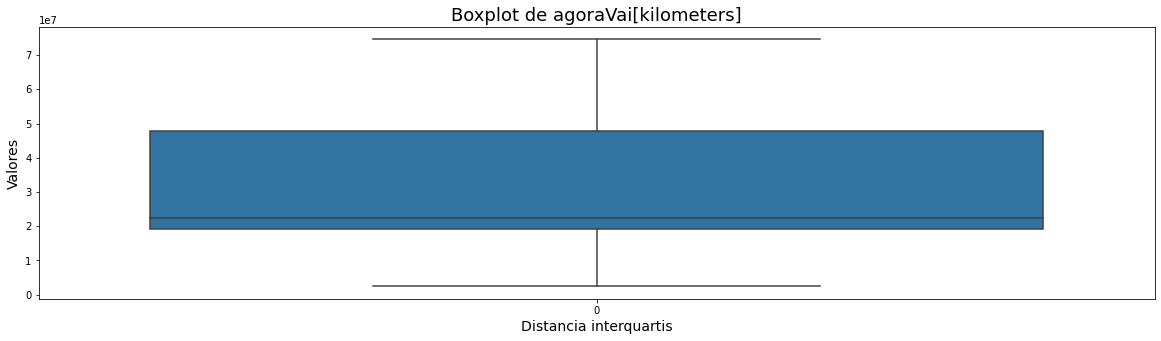

In [142]:
import seaborn as sns

ax = sns.boxplot(data=agoraVai['kilometers'], orient='v')
ax.figure.set_size_inches(20, 5)
ax.set_title('Boxplot de agoraVai[kilometers]', fontsize=18)
ax.set_ylabel('Valores', fontsize=14)
ax.set_xlabel('Distancia interquartis', fontsize=14)


  * Histograma mostrando quantos objetos perigosos tiveram aproximações com a
    terra entre os anos 2000 e 2021 (agrupe os objetos por ano);
  * Histograma de tamanhos de objetos que são perigosos;
  * Histograma de tamanhos de objetos não perigosos;

In [186]:

filtered_df_terra['close_approach_date']= pd.to_datetime(filtered_df_terra['close_approach_date']) 

filtered_df_terra['year'] = pd.DatetimeIndex(filtered_df_terra['close_approach_date']).year
filtered_df_terra['month'] = pd.DatetimeIndex(filtered_df_terra['close_approach_date']).month

(filtered_df_terra)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity,miss_distance,orbiting_body,year,month
2,1900-07-27,1900-Jul-27 20:47,-2191029180000,"{'kilometers_per_second': '23.8645306705', 'ki...","{'astronomical': '0.2177281759', 'lunar': '84....",Earth,1900,7
4,1903-09-02,1903-Sep-02 16:25,-2093240100000,"{'kilometers_per_second': '20.7059211769', 'ki...","{'astronomical': '0.192051142', 'lunar': '74.7...",Earth,1903,9
5,1904-07-26,1904-Jul-26 08:05,-2064930900000,"{'kilometers_per_second': '15.8484563854', 'ki...","{'astronomical': '0.0426654763', 'lunar': '16....",Earth,1904,7
7,1907-08-23,1907-Aug-23 15:07,-1967878380000,"{'kilometers_per_second': '30.7221068317', 'ki...","{'astronomical': '0.4441808062', 'lunar': '172...",Earth,1907,8
8,1908-08-17,1908-Aug-17 14:30,-1936776600000,"{'kilometers_per_second': '14.3282626319', 'ki...","{'astronomical': '0.1463952114', 'lunar': '56....",Earth,1908,8
...,...,...,...,...,...,...,...,...
275,2191-09-02,2191-Sep-02 09:17,6995236620000,"{'kilometers_per_second': '15.3625768153', 'ki...","{'astronomical': '0.1327627145', 'lunar': '51....",Earth,2191,9
277,2192-07-28,2192-Jul-28 09:17,7023748620000,"{'kilometers_per_second': '21.4820097709', 'ki...","{'astronomical': '0.1470280974', 'lunar': '57....",Earth,2192,7
278,2195-09-03,2195-Sep-03 14:04,7121570640000,"{'kilometers_per_second': '23.0727557116', 'ki...","{'astronomical': '0.251472684', 'lunar': '97.8...",Earth,2195,9
279,2196-08-01,2196-Aug-01 09:17,7150324620000,"{'kilometers_per_second': '14.9085161104', 'ki...","{'astronomical': '0.0876420518', 'lunar': '34....",Earth,2196,8


In [187]:
df_2000and2021= ((filtered_df_terra['year'] >= 2000) & (filtered_df_terra['year'] <=2021))
df_2000and2021 = filtered_df_terra[df_2000and2021]
df_2000and2021

,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity,miss_distance,orbiting_body,year,month
97,2000-08-28,2000-Aug-28 19:27,967490820000,"{'kilometers_per_second': '26.0907488086', 'ki...","{'astronomical': '0.3248796944', 'lunar': '126...",Earth,2000,8
99,2001-08-06,2001-Aug-06 07:55,997084500000,"{'kilometers_per_second': '14.3848839091', 'ki...","{'astronomical': '0.1265868482', 'lunar': '49....",Earth,2001,8
101,2002-08-06,2002-Aug-06 15:09,1028646540000,"{'kilometers_per_second': '31.6672069464', 'ki...","{'astronomical': '0.434578856', 'lunar': '169....",Earth,2002,8
102,2005-08-30,2005-Aug-30 06:32,1125383520000,"{'kilometers_per_second': '15.2437456043', 'ki...","{'astronomical': '0.1303453317', 'lunar': '50....",Earth,2005,8
103,2006-07-27,2006-Jul-27 04:50,1153975800000,"{'kilometers_per_second': '21.8838684168', 'ki...","{'astronomical': '0.1594837754', 'lunar': '62....",Earth,2006,7
105,2009-09-01,2009-Sep-01 09:51,1251798660000,"{'kilometers_per_second': '22.6130430106', 'ki...","{'astronomical': '0.2382802952', 'lunar': '92....",Earth,2009,9
106,2010-07-30,2010-Jul-30 05:23,1280467380000,"{'kilometers_per_second': '15.0279648636', 'ki...","{'astronomical': '0.0796736713', 'lunar': '30....",Earth,2010,7
107,2013-08-21,2013-Aug-21 07:22,1377069720000,"{'kilometers_per_second': '32.6907030774', 'ki...","{'astronomical': '0.4961922897', 'lunar': '193...",Earth,2013,8
108,2014-08-23,2014-Aug-23 08:41,1408783260000,"{'kilometers_per_second': '14.4814181829', 'ki...","{'astronomical': '0.1446197173', 'lunar': '56....",Earth,2014,8
111,2015-07-30,2015-Jul-30 10:21,1438251660000,"{'kilometers_per_second': '25.0600252646', 'ki...","{'astronomical': '0.251613102', 'lunar': '97.8...",Earth,2015,7


In [188]:
df_2000and2021.count()

close_approach_date          12
close_approach_date_full     12
epoch_date_close_approach    12
relative_velocity            12
miss_distance                12
orbiting_body                12
year                         12
month                        12
dtype: int64

  * Histograma mostrando quantos objetos perigosos tiveram aproximações com a
    terra entre os anos 2000 e 2021 (agrupe os objetos por ano);
 

In [196]:
grouped = df_2000and2021.groupby(['orbiting_body', 'year']).sum()

print(grouped)

                    epoch_date_close_approach  month
orbiting_body year                                  
Earth         2000               967490820000      8
              2001               997084500000      8
              2002              1028646540000      8
              2005              1125383520000      8
              2006              1153975800000      7
              2009              1251798660000      9
              2010              1280467380000      7
              2013              1377069720000      8
              2014              1408783260000      8
              2015              1438251660000      7
              2018              1535981760000      9
              2019              1564153440000      7


Text(0.5, 0, 'Anos')

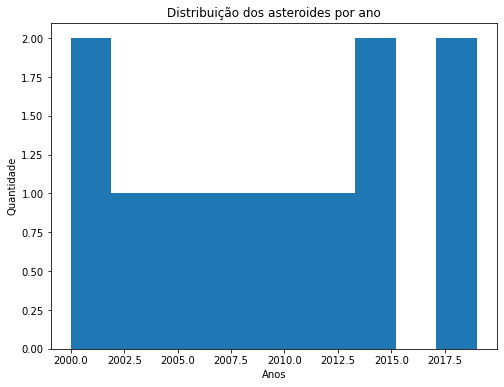

In [202]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_2000and2021['year'])
plt.title('Distribuição dos asteroides por ano')
plt.ylabel('Quantidade')
plt.xlabel('Anos')


 * Histograma de tamanhos de objetos que são perigosos;
  * Histograma de tamanhos de objetos não perigosos;

# Tô achando que peguei o banco de dados errado, mas taí boa parte dos exercícios